## Bitcoin Price Prediction
### 1. Get the data
#### Bitcoin Historical Data (Only for 2021)
#### Source: (https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd)

Uploading Code

In [1]:
from google.colab import files
uploaded = files.upload()

Saving BTC-2021min.csv to BTC-2021min.csv


In [2]:
!ls -al
!pwd

total 61460
drwxr-xr-x 1 root root     4096 Jun 19 19:52 .
drwxr-xr-x 1 root root     4096 Jun 19 19:10 ..
-rw-r--r-- 1 root root 62912837 Jun 19 19:52 BTC-2021min.csv
drwxr-xr-x 4 root root     4096 Jun 15 13:41 .config
drwxr-xr-x 1 root root     4096 Jun 15 13:42 sample_data
/content


In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

f = open('BTC-2021min.csv','r')
data = pd.read_csv(f,header=0)
data.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


data length: 610782
The first 5 data:
 [[43046.58 43046.58 43046.58 43046.58]
 [43046.58 43018.23 43046.59 43018.23]
 [43016.03 43022.24 43022.24 43016.03]
 [42999.44 43035.16 43035.16 42999.44]
 [43049.46 43077.82 43077.82 43049.46]]


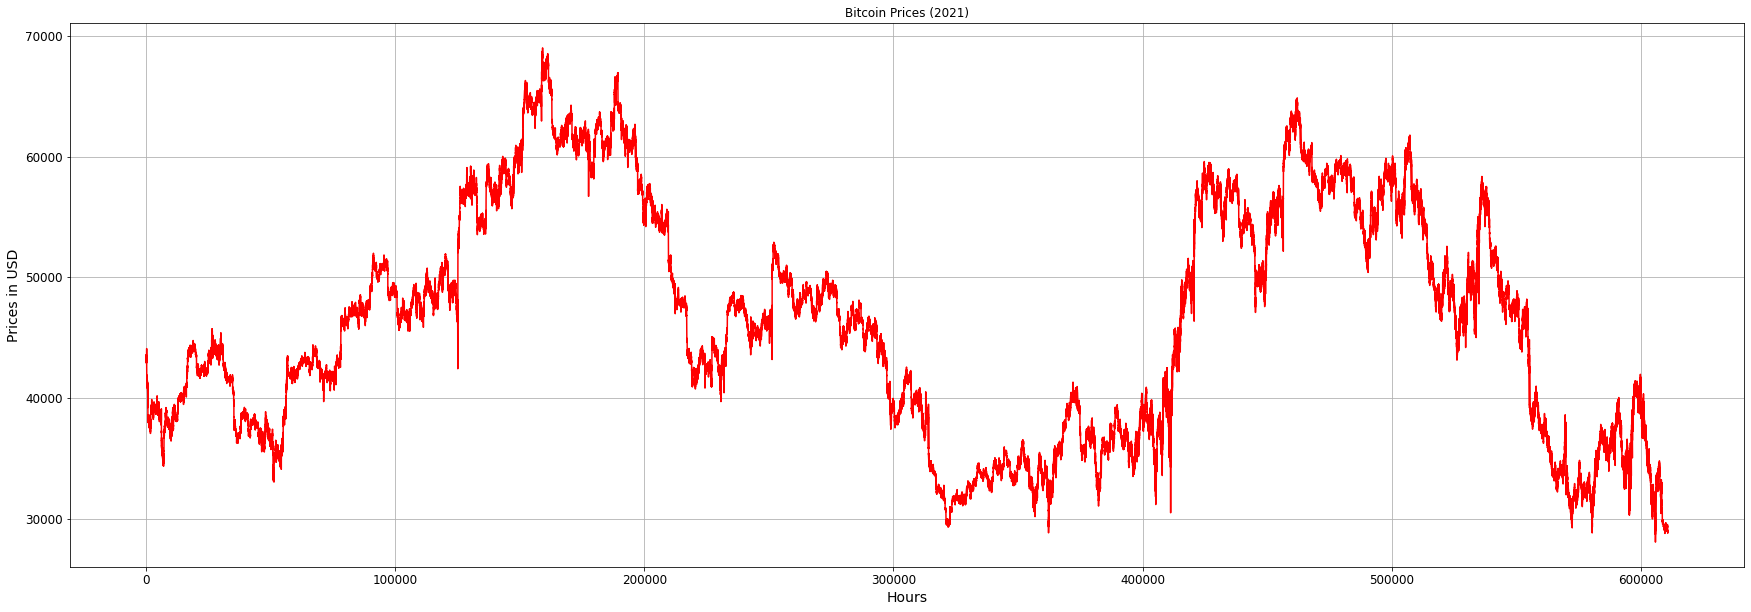

In [53]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

f = open('BTC-2021min.csv','r')
coindesk_data = pd.read_csv(f,header=0)
# dates=coindesk_data['date'].map(lambda x: x.day).to_list().reverse()
seq = coindesk_data[['close','open', 'high', 'low']].to_numpy()
data_length = len(seq)
print('data length:', data_length)
print('The first 5 data:\n', seq[:5])

# plotting
plt.figure(figsize=(30,10))
plt.plot(seq[0:-1,0],color='red')
plt.title('Bitcoin Prices (2021)')
plt.xlabel('Hours')
plt.ylabel('Prices in USD')
plt.grid()
plt.show()

### 2. Split the Dataset

In [16]:
import numpy as np

def seq2dataset(seq, window, horizon):
  X=[]
  Y=[]
  for i in range(len(seq)-(window + horizon) + 1):
    x = seq[i:(i + window)]
    y = (seq[i + window + horizon - 1])
    X.append(x); Y.append(y)
  
  return np.array(X), np.array(Y)

#w = 7 # a week
w = 30 # a month
#w = 90 # three months
h = 1

X, Y = seq2dataset(seq,w,h)
print(X.shape, Y.shape)
print(X[0], Y[0])

(610752, 30, 4) (610752, 4)
[[43046.58 43046.58 43046.58 43046.58]
 [43046.58 43018.23 43046.59 43018.23]
 [43016.03 43022.24 43022.24 43016.03]
 [42999.44 43035.16 43035.16 42999.44]
 [43049.46 43077.82 43077.82 43049.46]
 [43088.92 43078.73 43092.09 43078.73]
 [43090.55 43095.57 43095.57 43068.85]
 [43083.17 43098.34 43098.42 43083.17]
 [43098.42 43091.15 43098.42 43053.76]
 [43098.42 43073.99 43098.42 43073.99]
 [43107.67 43107.67 43107.67 43107.67]
 [43107.67 43089.57 43107.67 43089.57]
 [43093.52 43065.82 43106.72 43065.82]
 [43065.82 43085.12 43085.12 43042.51]
 [43047.74 43002.   43047.74 42999.7 ]
 [42976.12 42953.79 42976.12 42937.05]
 [42960.8  43002.2  43002.2  42960.8 ]
 [43002.3  43018.57 43018.57 43002.3 ]
 [43030.53 43011.93 43032.45 43004.32]
 [43011.93 43009.83 43011.93 43009.83]
 [43009.83 42993.4  43009.83 42993.4 ]
 [42983.81 42984.44 42993.55 42983.81]
 [42984.45 42982.96 42984.45 42982.96]
 [42982.96 42950.67 42982.96 42950.67]
 [42939.95 42918.62 42939.95 42878.1

In [17]:
# Split the dataset
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)
# Train
#X_train = X[:split_train]; y_train=Y[:split_train]
X_train = X[:split_train, :, [0]]; y_train=Y[:split_train, [0]]
# Valid
#X_valid = X[split_train:split_valid]; y_valid=Y[split_train:split_valid]
X_valid = X[split_train:split_valid,:, [0]]; y_valid=Y[split_train:split_valid,[0]]
# Test
#X_test = X[split_valid:]; y_test=Y[split_valid:]
X_test = X[split_valid:,:, [0]]; y_test=Y[split_valid:,[0]]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(427526, 30, 1) (427526, 1)
(122150, 30, 1) (122150, 1)
(61076, 30, 1) (61076, 1)


## 3.Plotting definitions

In [40]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#####################################################
## plot utility functions
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    # plt.axis([1, 200, 10000, 1000000])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.grid(True)

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    #plt.hlines(0, 0, 100, linewidth=1)
    #plt.axis([0, n_steps + 1, -1, 1])

## 4. Forecasting Several Steps Ahead

In [23]:
def seq2dataset_long(seq, window, horizon):
  X=[]
  Y=[]
  for i in range(len(seq)-(window + horizon) + 1):
    x = seq[i:(i + window)]
    y = seq[i + window:i + window + horizon]
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)

w = 30
h = 7

X, Y = seq2dataset_long(seq,w,h)
print(X.shape, Y.shape)
#print(X[0], Y[0])

# Split the dataset
split_train = int(len(X)*0.8)

# Train
X_train = X[:split_train, :, [0]]; y_train=Y[:split_train, :, [0]]
# Valid
X_valid = X[split_train:,:, [0]]; y_valid=Y[split_train:,:,[0]]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(610746, 30, 4) (610746, 7, 4)
(488596, 30, 1) (488596, 7, 1)
(122150, 30, 1) (122150, 7, 1)


### 4.1. Simple RNN

In [42]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(7, activation='relu', input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(learning_rate=0.002)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),batch_size=64*4)

Epoch 1/10
1909/1909 [==============================] - 15s 7ms/step - loss: 110449216.0000 - val_loss: 182754.0312
Epoch 2/10
1909/1909 [==============================] - 14s 7ms/step - loss: 140405.4531 - val_loss: 124967.0469
Epoch 3/10
1909/1909 [==============================] - 14s 7ms/step - loss: 138926.7344 - val_loss: 119236.1016
Epoch 4/10
1909/1909 [==============================] - 14s 7ms/step - loss: 103312.5938 - val_loss: 84753.3047
Epoch 5/10
1909/1909 [==============================] - 14s 7ms/step - loss: 76031.6953 - val_loss: 103658.6719
Epoch 6/10
1909/1909 [==============================] - 14s 7ms/step - loss: 65082.2148 - val_loss: 84316.8594
Epoch 7/10
1909/1909 [==============================] - 15s 8ms/step - loss: 61739.5898 - val_loss: 69234.2109
Epoch 8/10
1909/1909 [==============================] - 14s 7ms/step - loss: 53942.1875 - val_loss: 53646.3047
Epoch 9/10
1909/1909 [==============================] - 14s 7ms/step - loss: 44802.5039 - val_loss: 8

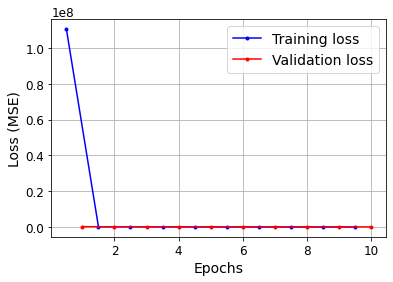

In [43]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

### 4.2. LSTM

In [44]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.LSTM(7, activation='relu', input_shape=[None, 1]),
    keras.layers.Dense(7)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),batch_size=64*4)

Epoch 1/10
1909/1909 [==============================] - 35s 17ms/step - loss: 976654272.0000 - val_loss: 53788672.0000
Epoch 2/10
1909/1909 [==============================] - 30s 16ms/step - loss: 8105923.5000 - val_loss: 25834.9609
Epoch 3/10
1909/1909 [==============================] - 30s 16ms/step - loss: 17359.1836 - val_loss: 24080.7832
Epoch 4/10
1909/1909 [==============================] - 30s 16ms/step - loss: 17251.7676 - val_loss: 24086.0723
Epoch 5/10
1909/1909 [==============================] - 30s 16ms/step - loss: 17204.7871 - val_loss: 24091.4355
Epoch 6/10
1909/1909 [==============================] - 30s 16ms/step - loss: 17194.9883 - val_loss: 24120.8691
Epoch 7/10
1909/1909 [==============================] - 31s 16ms/step - loss: 17209.1680 - val_loss: 24097.5645
Epoch 8/10
1909/1909 [==============================] - 31s 16ms/step - loss: 17247.2676 - val_loss: 24120.7051
Epoch 9/10
1909/1909 [==============================] - 31s 16ms/step - loss: 17292.2090 - val_

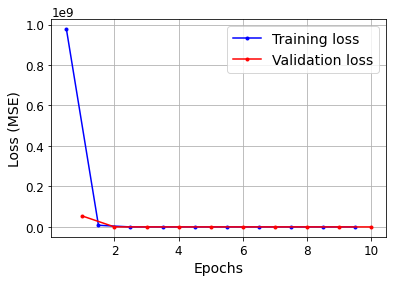

In [45]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [46]:
print(y_valid.shape)
y_pred = model.predict(X_valid)
print(y_pred.shape)

(122150, 7, 1)
(122150, 7)


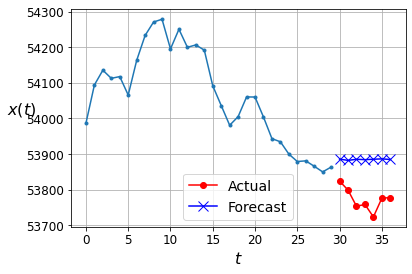

In [47]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :], "bx-", label="Forecast", markersize=10)
    #plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(loc='lower center',fontsize=14)

plot_multiple_forecasts(X_valid, y_valid, y_pred)